# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

C:\Python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

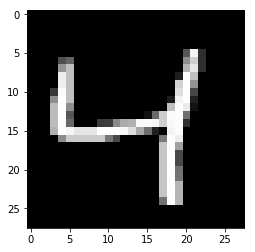

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32, (None, size), name = "inputs")
targets_ = tf.placeholder(tf.float32, (None, size), name = "targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, size, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name = "output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6946
Epoch: 1/20... Training loss: 0.6916
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6850
Epoch: 1/20... Training loss: 0.6808
Epoch: 1/20... Training loss: 0.6762
Epoch: 1/20... Training loss: 0.6702
Epoch: 1/20... Training loss: 0.6634
Epoch: 1/20... Training loss: 0.6548
Epoch: 1/20... Training loss: 0.6459
Epoch: 1/20... Training loss: 0.6349
Epoch: 1/20... Training loss: 0.6243
Epoch: 1/20... Training loss: 0.6099
Epoch: 1/20... Training loss: 0.5963
Epoch: 1/20... Training loss: 0.5825
Epoch: 1/20... Training loss: 0.5652
Epoch: 1/20... Training loss: 0.5489
Epoch: 1/20... Training loss: 0.5326
Epoch: 1/20... Training loss: 0.5152
Epoch: 1/20... Training loss: 0.4950
Epoch: 1/20... Training loss: 0.4774
Epoch: 1/20... Training loss: 0.4620
Epoch: 1/20... Training loss: 0.4440
Epoch: 1/20... Training loss: 0.4291
Epoch: 1/20... Training loss: 0.4153
Epoch: 1/20... Training loss: 0.3915
Epoch: 1/20... Training loss: 0.3862
E

Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1804
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1765
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1795
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1856
E

Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1449
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1512
E

Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1301
E

Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1280
E

Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1173
E

Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1116
E

Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.0987
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1051
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1074
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0985
E

Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1009
E

Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0930
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0982
E

Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0981
E

Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0882
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0892
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0885
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0991
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0932


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

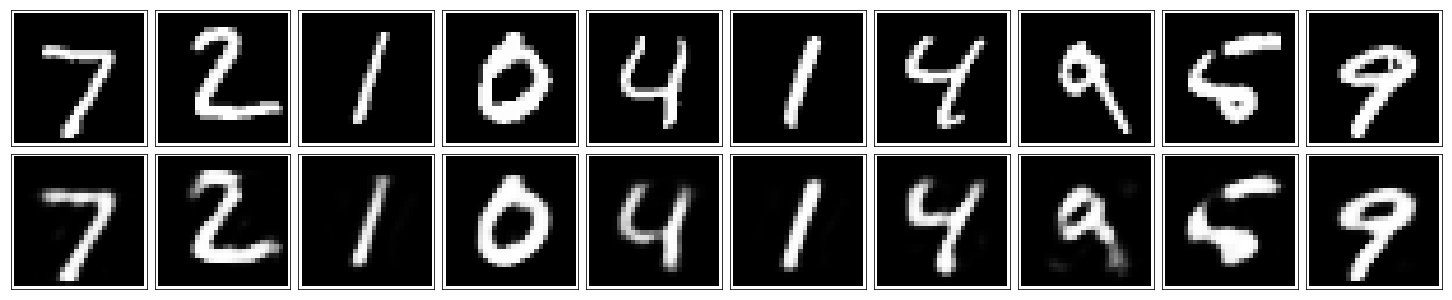

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.